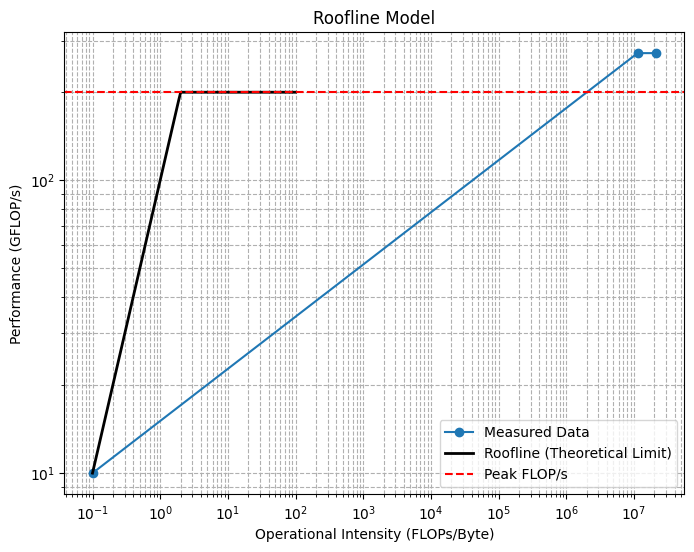

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Measured data (example)
operational_intensity = np.array([0.1, 11358527, 21358527])  # FLOPs per byte
performance = np.array([10, 272, 272])  # GFLOP/s

# System parameters
peak_flops = 200     # GFLOP/s
bandwidth = 100      # GB/s

# Generate roofline curve
oi_vals = np.logspace(-1, 2, 100)  # Operational intensity range
roofline = np.minimum(bandwidth * oi_vals, peak_flops)

# Plotting
plt.figure(figsize=(8,6))
plt.loglog(operational_intensity, performance, 'o-', label='Measured Data')
plt.loglog(oi_vals, roofline, 'k-', linewidth=2, label='Roofline (Theoretical Limit)')
plt.axhline(y=peak_flops, color='r', linestyle='--', label='Peak FLOP/s')

plt.xlabel('Operational Intensity (FLOPs/Byte)')
plt.ylabel('Performance (GFLOP/s)')
plt.title('Roofline Model')
plt.legend()
plt.grid(True, which='both', linestyle='--')
plt.show()

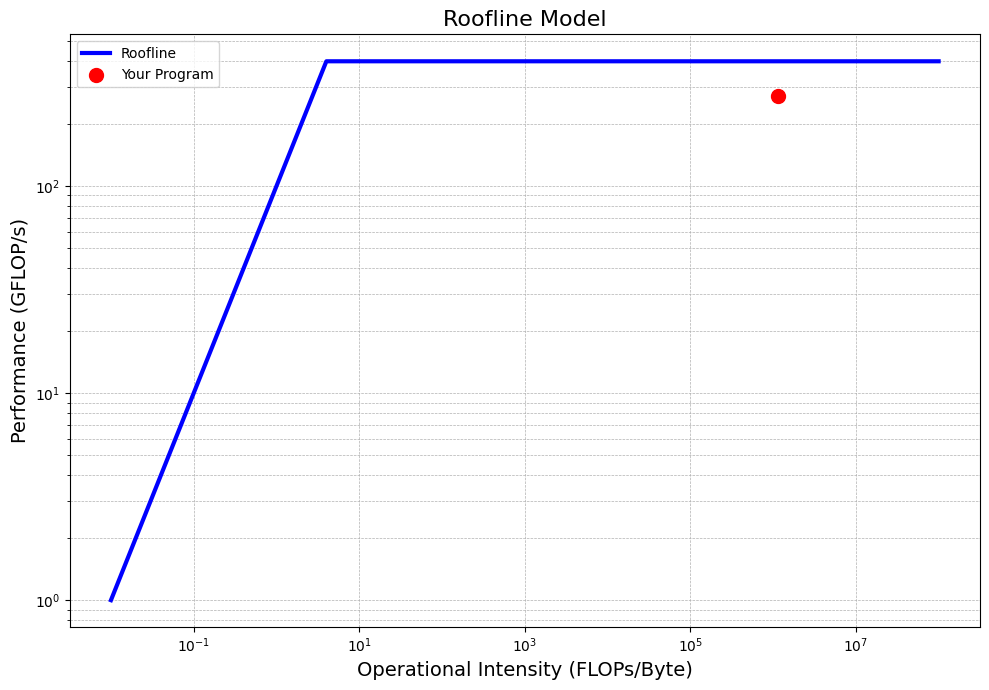

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Roofline constants (adjust to your system)
memory_bandwidth = 100  # GB/s
compute_peak = 400       # GFLOP/s

# Create operational intensity range
oi = np.logspace(-2, 8, 1000)  # from 0.01 to 10^8 FLOPs/byte

# Roofline curve: min(memory_bw * OI, compute_peak)
roofline = np.minimum(memory_bandwidth * oi, compute_peak)

# Your workload point
workload_oi = 1135852
workload_perf = 272

# Plotting
plt.figure(figsize=(10, 7))
plt.loglog(oi, roofline, label='Roofline', linewidth=3, color='blue')
plt.scatter(workload_oi, workload_perf, color='red', s=100, label='Your Program')

# Labels and styling
plt.xlabel('Operational Intensity (FLOPs/Byte)', fontsize=14)
plt.ylabel('Performance (GFLOP/s)', fontsize=14)
plt.title('Roofline Model', fontsize=16)
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# replace with actual data
message_sizes = np.array([1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024])  # in Bytes
rtt_times = np.array([10, 12, 16, 22, 30, 42, 55, 70, 90, 120, 160])  # in microseconds

coeffs = np.polyfit(message_sizes, rtt_times, 1)
latency_extrapolated = coeffs[1]  # y-intercept

plt.plot(message_sizes, rtt_times, 'o', label='Measured RTT')
plt.plot(message_sizes, coeffs[0]*message_sizes + coeffs[1], '--', label='Linear Fit')
plt.xlabel('Message Size (Bytes)')
plt.ylabel('Round-Trip Time (microseconds)')
plt.title(f'Extrapolated Latency at Zero Message Size: {latency_extrapolated:.2f} µs')
plt.legend()
plt.show()